In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def printScores(model, X, Y):
    # użyj classification_report() żeby policzyć najpopularniejsze miary 
    print("Classification report:")
    print(classification_report(Y, model.predict(X)))
    # wypisz macierz pomyłek 
    print("Confusion matrix:")
    print(confusion_matrix(Y, model.predict(X)))

---
# Drzewa decyzyjne #
---
Autor: Anna Dawid
Korekta: Rafał Masełek
Rozwiązanie: Zofia Hendrysiak

## 1. Pobranie i analiza danych uczących ##
Będziemy dziś pracować na [zbiorze danych](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) uzyskanych z biopsji (aspiracyjnej cienkoigłowej) piersi. Zadaniem naszym jest wytrenowanie klasyfikatora, który po cechach wyników biopsji będzie klasyfikował guz jako łagodny lub złośliwy.

## Zbiór danych "cancer"
Dla wygodny ponownie umieścimy dane w `pandas.DataFrame`.

Proszę:
- załadować dane za pomocą `sklearn.dataset.load_breast_cancer`,
- umieścić dane w `pandas.DataFrame`
- dodać kolumnę 'label' wypełnioną wartościami ```cancer.target```
- wypisać dostępne kolumny

Oczekiwany wynik:
```
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
```

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer["data"], columns = cancer["feature_names"])
df["label"] = cancer.target

In [ ]:
# nazwy klas
print(df.head())
# nazwy cech (kolumn)
print(df.columns)

   mean radius  mean texture  ...  worst fractal dimension  label
0        17.99         10.38  ...                  0.11890      0
1        20.57         17.77  ...                  0.08902      0
2        19.69         21.25  ...                  0.08758      0
3        11.42         20.38  ...                  0.17300      0
4        20.29         14.34  ...                  0.07678      0

[5 rows x 31 columns]
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst conca

### Proszę:

* wypisać na ekran liczebność klas
* proszę narysować wykresy skrzypcowe dla poszczególnych cech z podziałem na gatunki,
* na podstawie rysunków proszę ustalić czy cechy wymagają normalizacji i czy jest ona potrzebna w przypadku drzew decyzyjnych

**Wskazówki** 
* zliczając klasy proszę skorzystać z metody ```DataFrame.groupby(...)```
* wykres skrzypcowy proszę narysować korzystając z kodu z notatnika "05M_Bayes_irysy"

Oczekiwany wynik:
```
Class counts:
 label
0    212
1    357
Name: label, dtype: int64
```

Class counts:
 label
0    212
1    357
Name: label, dtype: int64
mean radius 0
mean texture 1
mean perimeter 2
mean area 3
mean smoothness 4
mean compactness 5
mean concavity 6
mean concave points 7
mean symmetry 8
mean fractal dimension 9
radius error 10
texture error 11
perimeter error 12
area error 13
smoothness error 14
compactness error 15
concavity error 16
concave points error 17
symmetry error 18
fractal dimension error 19
worst radius 20
worst texture 21
worst perimeter 22
worst area 23
worst smoothness 24
worst compactness 25
worst concavity 26
worst concave points 27
worst symmetry 28
worst fractal dimension 29
label 30


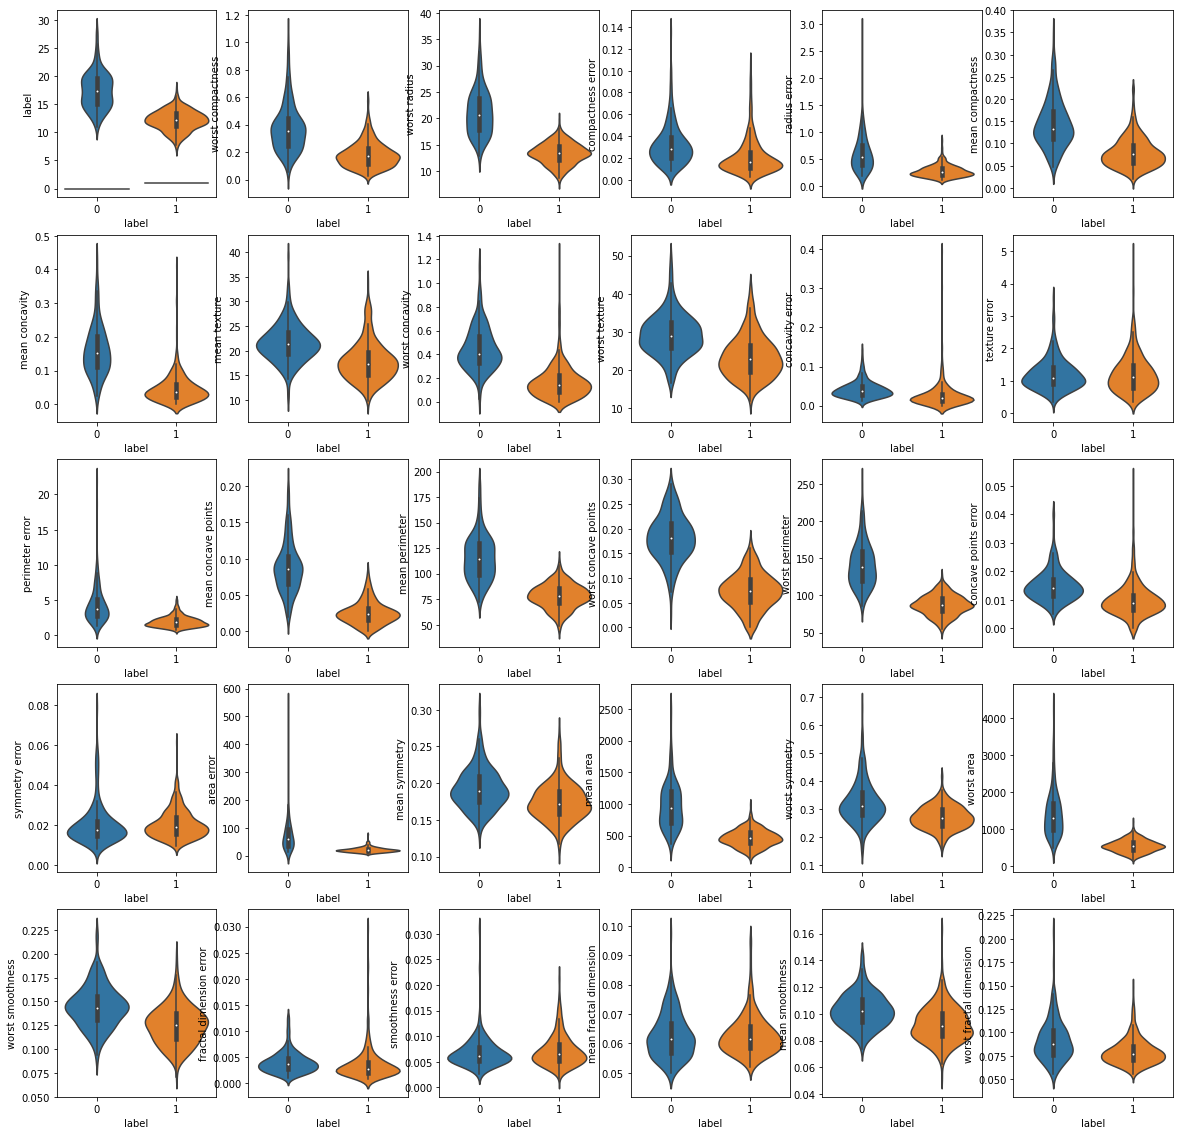

In [ ]:
print("Class counts:\n", df.groupby('label')['label'].count())

fig, axes = plt.subplots(5,6,figsize=(20,20))

for i,name in enumerate(df.columns):
  print(name,i)
  sns.violinplot(data=df, x="label", y=name,ax=axes[i%5, i%6]); 

### Proszę: 

* narysować macierz korelacji (nie kowariancji!)

**Wskazówka**: proszę skorzystać z kodu z notanika "05_Bayes_irysy"

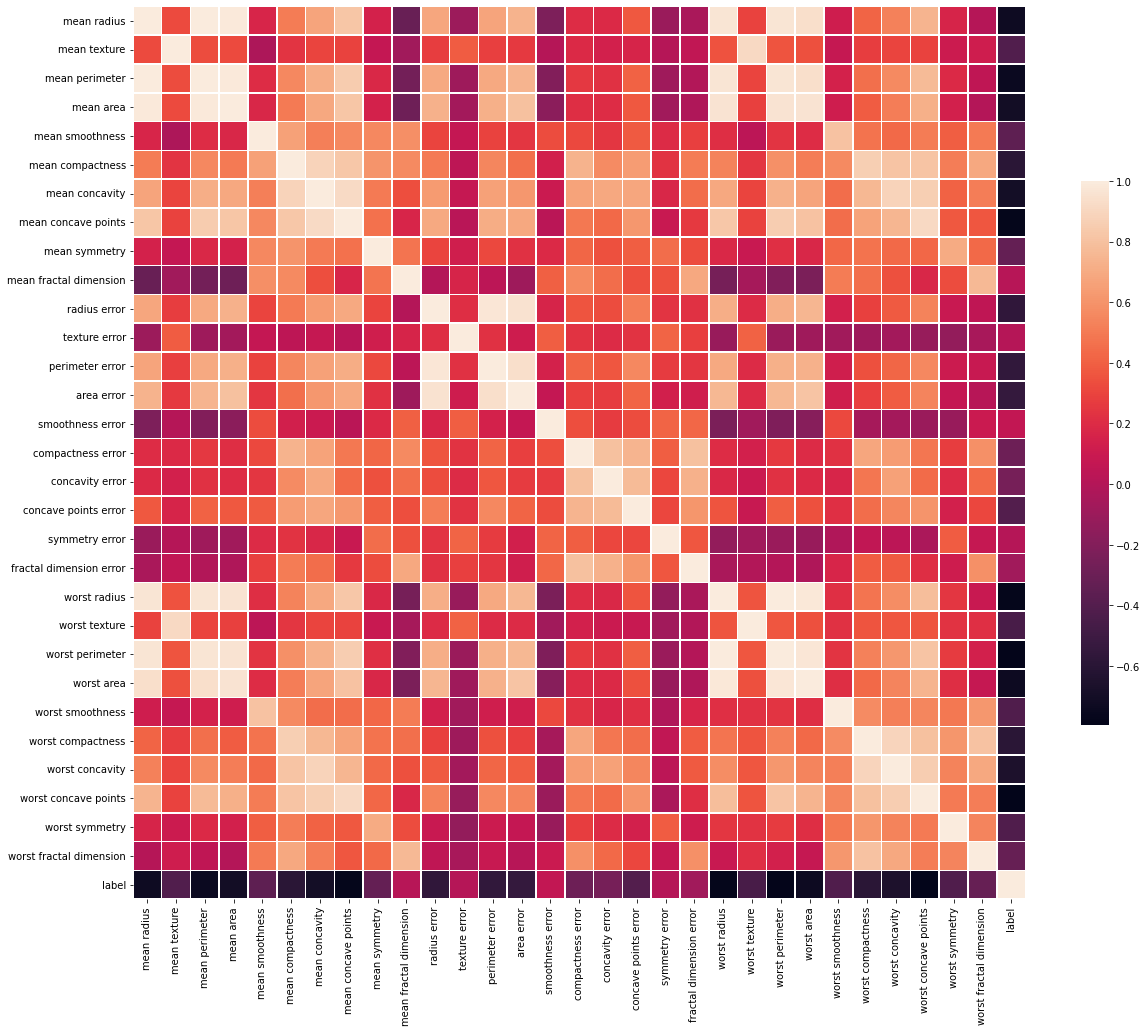

In [ ]:

corelationMatrix = df.corr()
fig, axes = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corelationMatrix, square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Proszę:
* podzielić dane na części uczącą i testową w proporcjach 80:20

**Uwaga**: proszę użyć parametru ```random_state=0``` by umożliowić porównanie wyników z innymi osobami

**Wkaszówka**: proszę skorzystać z funckji ```sklearn.model_selection.train_test_split```

In [ ]:
import sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']], df['label'], test_size=0.2, random_state=0)

## 2. Importujemy klasyfikator w postaci drzewa decyzyjnego ##
W bibliotece scikit-learn drzewa decyzyjne implementowane są przez klasę [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Szczegóły implementacji opisane są [tutaj](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).

Najprostszy przykład:

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Po dopasowaniu można przewidywać przynależność nowych przykładów:

In [ ]:
# punkt blisko (0,0)
print(clf.predict([[0.3, 0.3]])[0])
# punkt blisko (1,1)
print(clf.predict([[0.7, 0.7]])[0])
# punkty blisko środka
print(clf.predict([[0.49, 0.49]])[0])
print(clf.predict([[0.51, 0.51]])[0])

0
1
0
1


Poniższa komórka zwizualizuje nam co się tak na prawdę stało.

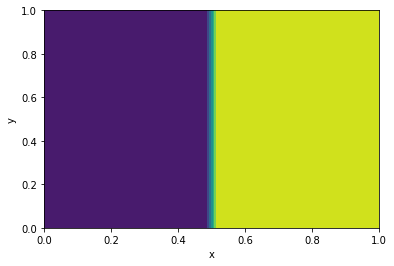

In [ ]:
N = 30
points = np.linspace(0.0, 1.0, N)
xx, yy = np.meshgrid(points, points)
zz = np.zeros((N, N))
for ix in range(N):
    for iy in range(N):
        zz[ix,iy] = clf.predict([[ xx[ix, iy], yy[ix, iy] ]])[0]

plt.contourf(xx, yy, zz)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Drzewo dokonało regresji -> podzieliło przestrzeń cech (x i y) na obszary odpowiadające poszczególnym klasom

Albo estymować prawdopodobieństwo przynależności do klas:

In [ ]:
print( clf.predict_proba( [[2., 2.]] ) )
print( clf.predict_proba( [[2., 0.]] ) )
print( clf.predict_proba( [[0., 2.]] ) )

[[0. 1.]]
[[0. 1.]]
[[1. 0.]]


## 3. Klasyfikacja guzów i wizualizacja drzewa ##

In [ ]:
# stwórz obiekt-klasyfikator drzewa decyzyjnego z domyślnymi parametrami
clf = tree.DecisionTreeClassifier()
# dofituj drzewo do danych o raku piersi
clf = clf.fit(X_train, y_train)

Po wytrenowaniu można zilustrować wynik za pomocą narzędzia Graphiz (wymaga to zainstalowania w systemie tego narzędzia), oraz doinstalowania do pythona biblioteki pydot:

In [ ]:
!pip3 install graphviz pydotplus

In [ ]:
import pydotplus
import io
from IPython.display import Image
from sklearn.tree import  export_graphviz

dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    rotate=False,
                    node_ids = True,
                    special_characters=True,
                    leaves_parallel=False,
                    feature_names = cancer.feature_names,
                    class_names=cancer.target_names,
                   )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png');

Otrzymany rysunek można bejrzeć klikając w menu po lewej, lub wyświetlająć go w komórce:

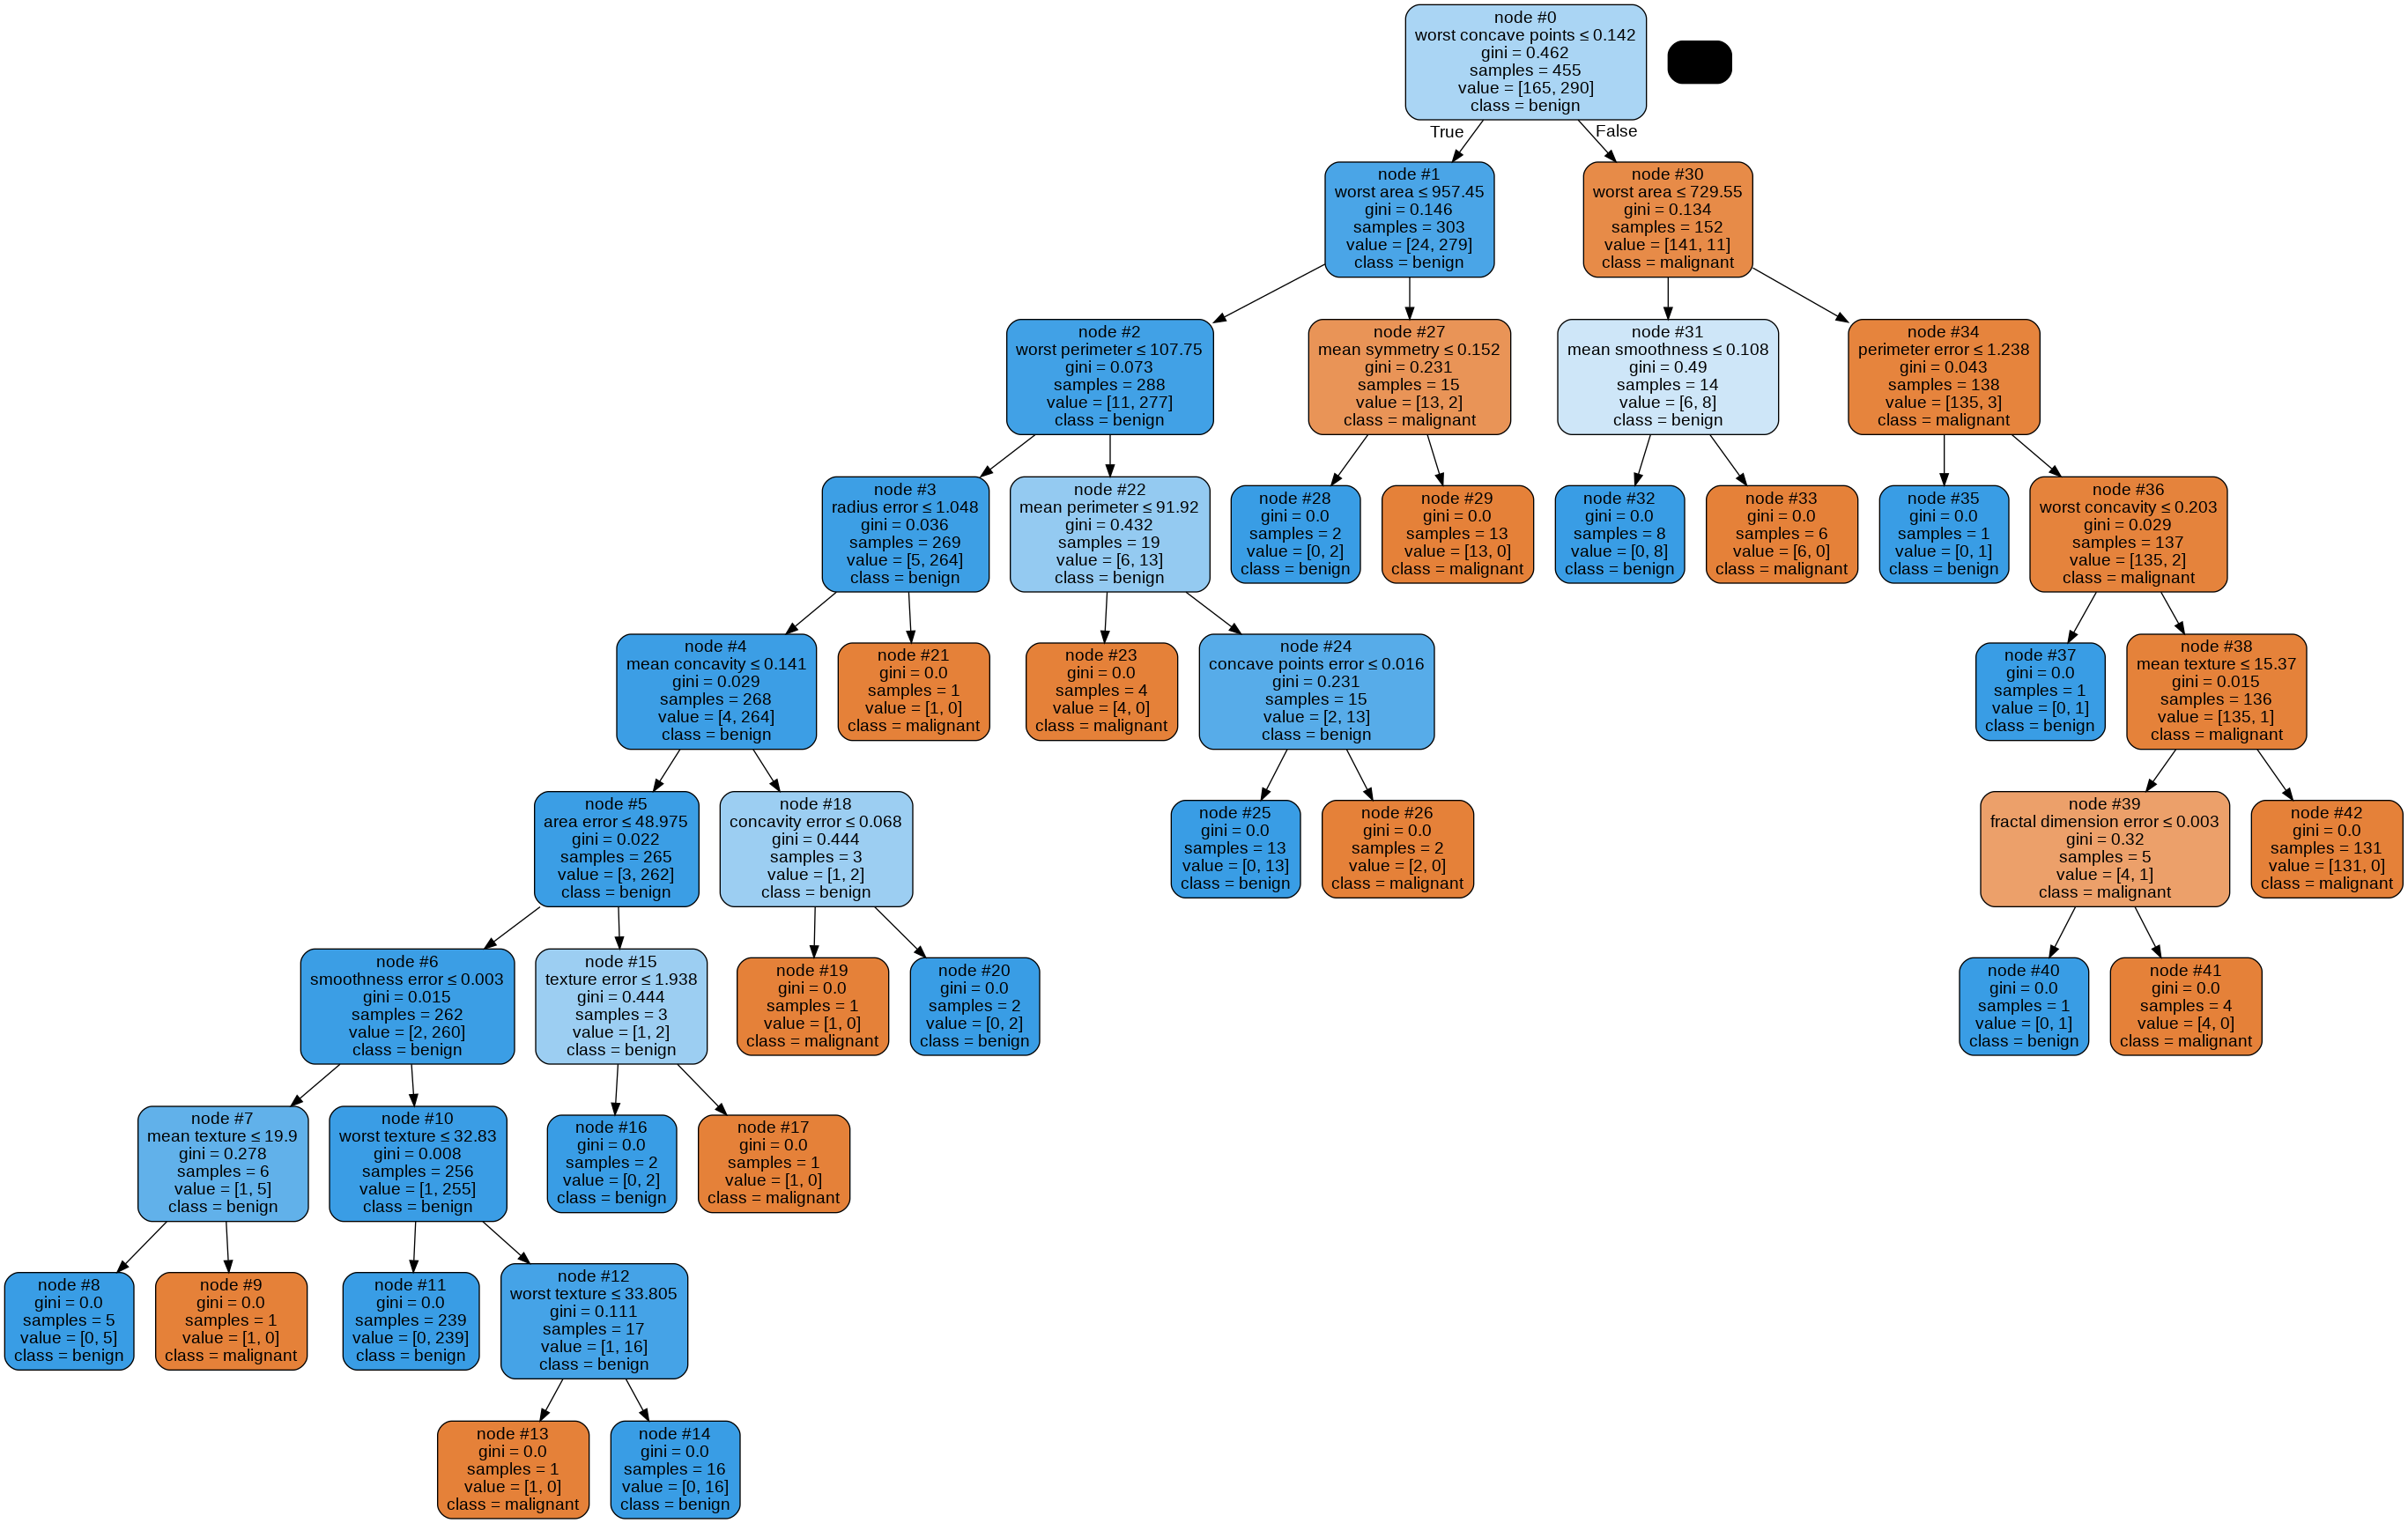

In [ ]:
from IPython.display import Image
Image(graph.create_png())

Czym jest "Gini", "samples", "value" oraz "class"? Co oznaczają kolory?

[Text(217.47692307692307, 206.56799999999998, 'worst concave points <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(168.83076923076922, 184.824, 'worst area <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(140.2153846153846, 163.07999999999998, 'worst perimeter <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(117.32307692307693, 141.336, 'radius error <= 1.048\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(105.87692307692308, 119.592, 'mean concavity <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(74.4, 97.848, 'area error <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(45.784615384615385, 76.10399999999998, 'smoothness error <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(22.892307692307693, 54.360000000000014, 'mean texture <= 19.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(11.446153846153846, 32.615999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Tex

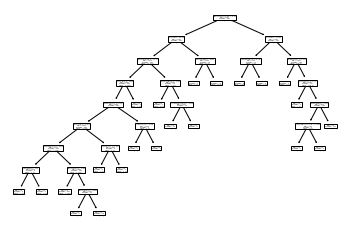

In [ ]:
# Alternatywą jest użycie wbudowanej metody 'plot_tree', ale wydaje mi się mniej przyjazna:
tree.plot_tree(clf, feature_names=cancer.feature_names)

Oczywiście oceniamy jakość tej klasyfikacji:

In [ ]:
def printScores(model, X, Y):
    # użyj classification_report() żeby policzyć najpopularniejsze miary 
    print("Classification report:")
    print(classification_report(Y, model.predict(X)))
    # wypisz macierz pomyłek 
    print("Confusion matrix:")
    print(confusion_matrix(Y, model.predict(X)))

X = X_test
Y = y_test

printScores(clf, X,Y)

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
[[44  3]
 [ 7 60]]


Co o niej myślicie? A sprawdźcie na wszelki wypadek klasyfikację danych treningowych?

In [ ]:
X = X_train
Y = y_train
printScores(clf, X,Y)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       290

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Confusion matrix:
[[165   0]
 [  0 290]]


#### Co to oznacza? :)

Sprawdźmy jeszcze które cechy są najważniejsze przy klasyfikacji

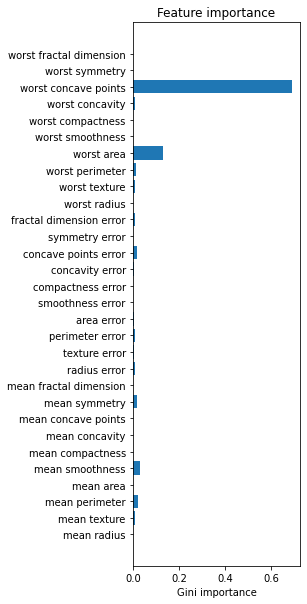

In [ ]:
plt.figure(figsize=(3,10))
# clf zawiera pole w którym jest znaczenie (ang. importance) wszystkich cech
# sprawdz w dokumentacji jak nazywa się to pole i wpisz do fi
fi = clf.feature_importances_
# wizualizujemy znaczenie cech
plt.barh(cancer.feature_names, fi)
plt.title('Feature importance')
plt.xlabel('Gini importance')
plt.show()

## 4. Regularyzacja drzewa przez przycinanie ##

A teraz crème de la crème uczenia maszynowego, czyli regularyzacja. Pamiętacie na czym ogólnie polega?

W przypadku drzew decyzyjnych polega przede wszystkim na:
- przycinaniu gałęzi i liści (czyli zmniejszaniu liczby węzłów) przez kontrolę parametru min_samples_leaf: mianowicie daje dolny limit na jak drobne gałązki może drzewo tworzyć. Jeśli kolejna gałązka miałaby rozpatrywać tylko liczbę przykładów < min_sample_leaf, to nie tworzy się. Domyślnie, min_sample_leaf = ?
- ograniczaniu głębokości drzewa, czyli jak wiele rozgałęzień może się stworzyć. Domyślnie max_depth = None. Co to znaczy? Patrz [tu](https://scikit-learn.org/0.22/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

Macie dwa wyjścia. Po pierwsze, poszukać optymalnych hiperparametrów ręcznie, jak ostatnio robiliście. Po drugie, skorzystać (z rozwagą!) z gotowej metody cost_complexity_pruning_path, w której bawicie się jednym parametrem 'cost complexity parameter', czyli ccp_alpha. Tutaj macie [tutorial](https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html). Jeśli będziecie korzystać z tej funkcji, to proszę o bogate komentarze, co się po drodze dzieje :)

Ostatecznym wynikiem ma być uzyskanie optymalnego drzewa oraz jego wizualizacja wraz z raportem klasyfikacji i macierzą pomyłek.

Powodzenia! :)

In [ ]:
# OPCJA ZNAJOMA
# 1. Stwórz klasyfikator drzewa z odpowiednimi parametrami i przetestuj jego działanie
# 2. Zmień parametry i powtórz
# 3. Użyj pętli, aby sprawdzić rózne wartości i znaleźć optymalne, np. dla jakich wartości parametrów accuracy jest największe?
# 4. Narysuj accuracy w funkcji min_sample_leaf i max_depth

### Automatyczne skanowanie parametrów drzewa

In [ ]:
# użyj funkcji cost_complexity_pruning_path żeby znaleźć ścieżkę przycinania dla zbioru uczącego
path = clf.cost_complexity_pruning_path(X_train, y_train)
# z obiektu path wyjmij wartości parametrów alpha i "nieczystości"
ccp_alphas, impurities = path.ccp_alphas, path.impurities

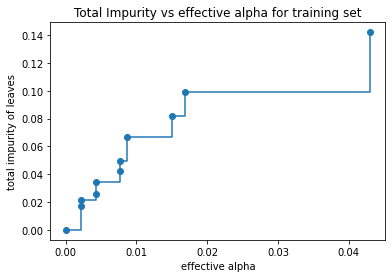

In [ ]:
fig, ax = plt.subplots()
# narysuj wykres punktowo-schodkowy (patrz dokumentacja) nieczystości w funkcji alpha
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

## Proszę:

* przeiterować wartości parametru ```cppp_alpha```
* dla każdego parametru utworzyć i wytrenować nowe drzewo
* wytrenowane drzewa zachować w liście ```clfs```

In [ ]:
clfs = []
# iteruj w pętli po wartościach parametrów alpha
# dla każdego alpha stwórz drzewo, dofituj i dodaj model do listy clfs
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    clf = clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32027199074911666


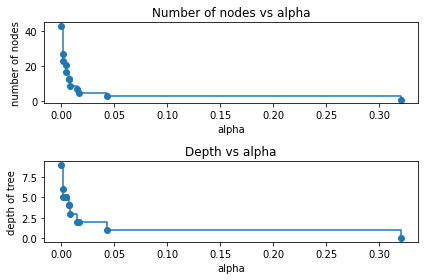

In [ ]:
# policzymy ilość węzłów w naszych modelach
node_counts = [clf.tree_.node_count for clf in clfs]
# i maksymalną "głębokość" 
depth = [clf.tree_.max_depth for clf in clfs]
# narysujemy powyższe wartości na wykresach punktowo-schodkowych
fig, ax = plt.subplots(2, 1)
# naryj liczbę węzłów w funkcji współczynników alpha
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
# naryj głębokość w funkcji współczynników alpha
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Proszę:

* narysować dokładność (ang. accuracy) w funkcjji parametru ```ccp_alpha``` dla zbiorów uczącego i treningowego

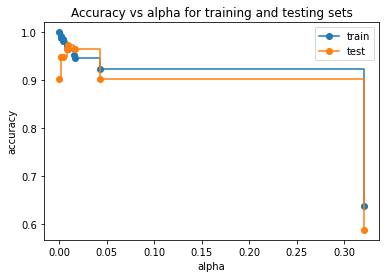

In [ ]:
# Teraz rusyjemy accuracy w funkcji alpha dla zbiorów uczącego i testowego
train_scores = [clf.score(X_train, y_train, ) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
# narysuj accuracy dla zbioru uczącego
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
# narysuj accuracy dla zbioru testowego
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Zadanie 1.
Bazując na powyższym kodzie, zbadaj zależność miary F1 od parametru:
- głębokości drzewa ```depth```

Co powinniśmy mieć z tyłu głowy dobierając rozmiar drzewa?

**Wskazówka**: do obliczenia metryki F1 proszę użyć funkcji ```sklearn.metrics.f1_score(...)```

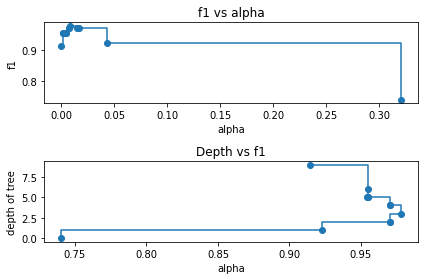

In [ ]:
f1 = [sklearn.metrics.f1_score(y_pred=clf.predict(X_test), y_true = y_test) for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
# naryj liczbę węzłów w funkcji współczynników alpha
ax[0].plot(ccp_alphas, f1, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("f1")
ax[0].set_title("f1 vs alpha")
# naryj głębokość w funkcji współczynników alpha
ax[1].plot(f1, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs f1")
fig.tight_layout()

## Zadanie 2.

* stwórz drzewo z optymalnymi parametrami znalezione wcześniej. Użyj odpowiedniej wartości parametreu ```cpp_alpha```
* zadaj wagi próbek tak, by ważona suma wszystkich próbek obu klas była taka sama, tzn. jeżeli masz 10 próbek klasy A i 5 próbek klasy B, to możesz dać     próbkom z klasy A wagę 0.5 a próbkom z klasy B wagę 1.0. 
* proszę sprawdzić czy wagi są poprawne
* przeprowadź trening na danych oryginalnych i ważonych
* porównaj jakośc klasyfikacji

**Wskazówka** do obliczania wag proszę użyć funkcji ```sklearn.utils.class_weight.compute_sample_weight```

In [ ]:
alpha = ccp_alphas[6]
sklearn.utils.class_weight.compute_sample_weight(class_weight = "balanced", )
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    clf = clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

TypeError: ignored

## Zadanie 3. ##
Na podstawie [tutorialu](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py), proszę przeanalizować strukturę drzewa.

In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 1 nodes and has the following tree structure:

node=0 is a leaf node.
